# Wine

Nesta prática, vamos prever a origem de um vinho a partir de suas características:

1. Carregue a base criando um Pandas DataFrame
2. Exiba algumas informações e dados sobre a base
3. Plote a distribuição e correlação das características da base
4. Normalize a base
5. Divida a base para treinamento e testes
6. Crie o classificador e classifique a base de testes
7. Avalie os resultados para um K fixo
8. Avalie os resultados em função do número de vizinhos K
9. Avalie o classificador utilizando validação cruzada

## 1. Carregue a base criando um Pandas DataFrame

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

data = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                    columns= data['feature_names'] + ['target'])

## 2. Exiba algumas informações e dados sobre a base

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 3. Plote a distribuição e correlação das características da base

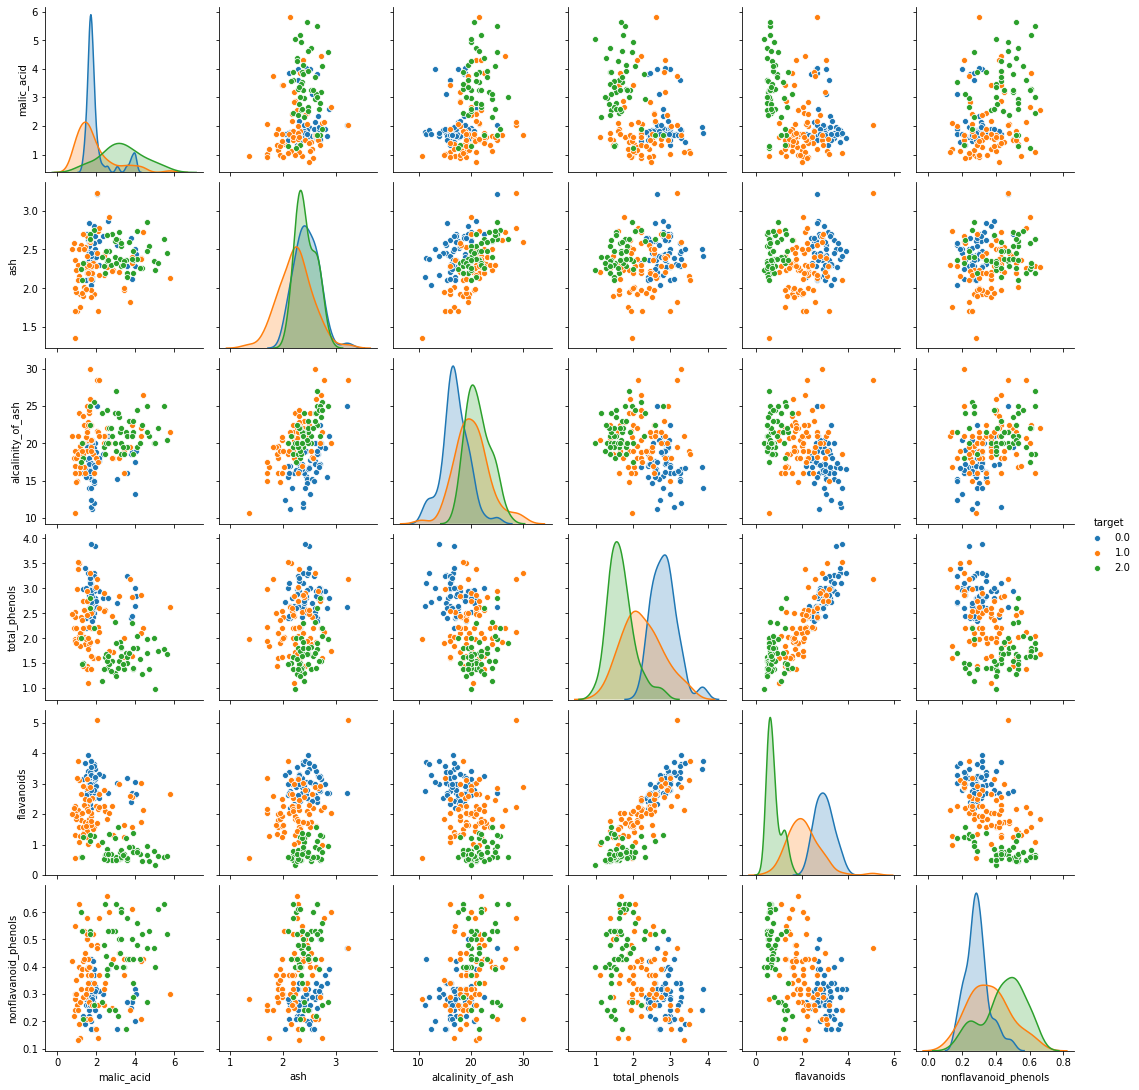

In [5]:
import seaborn as sns

sns.pairplot(wine,
             vars=["malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols"],
             hue='target')

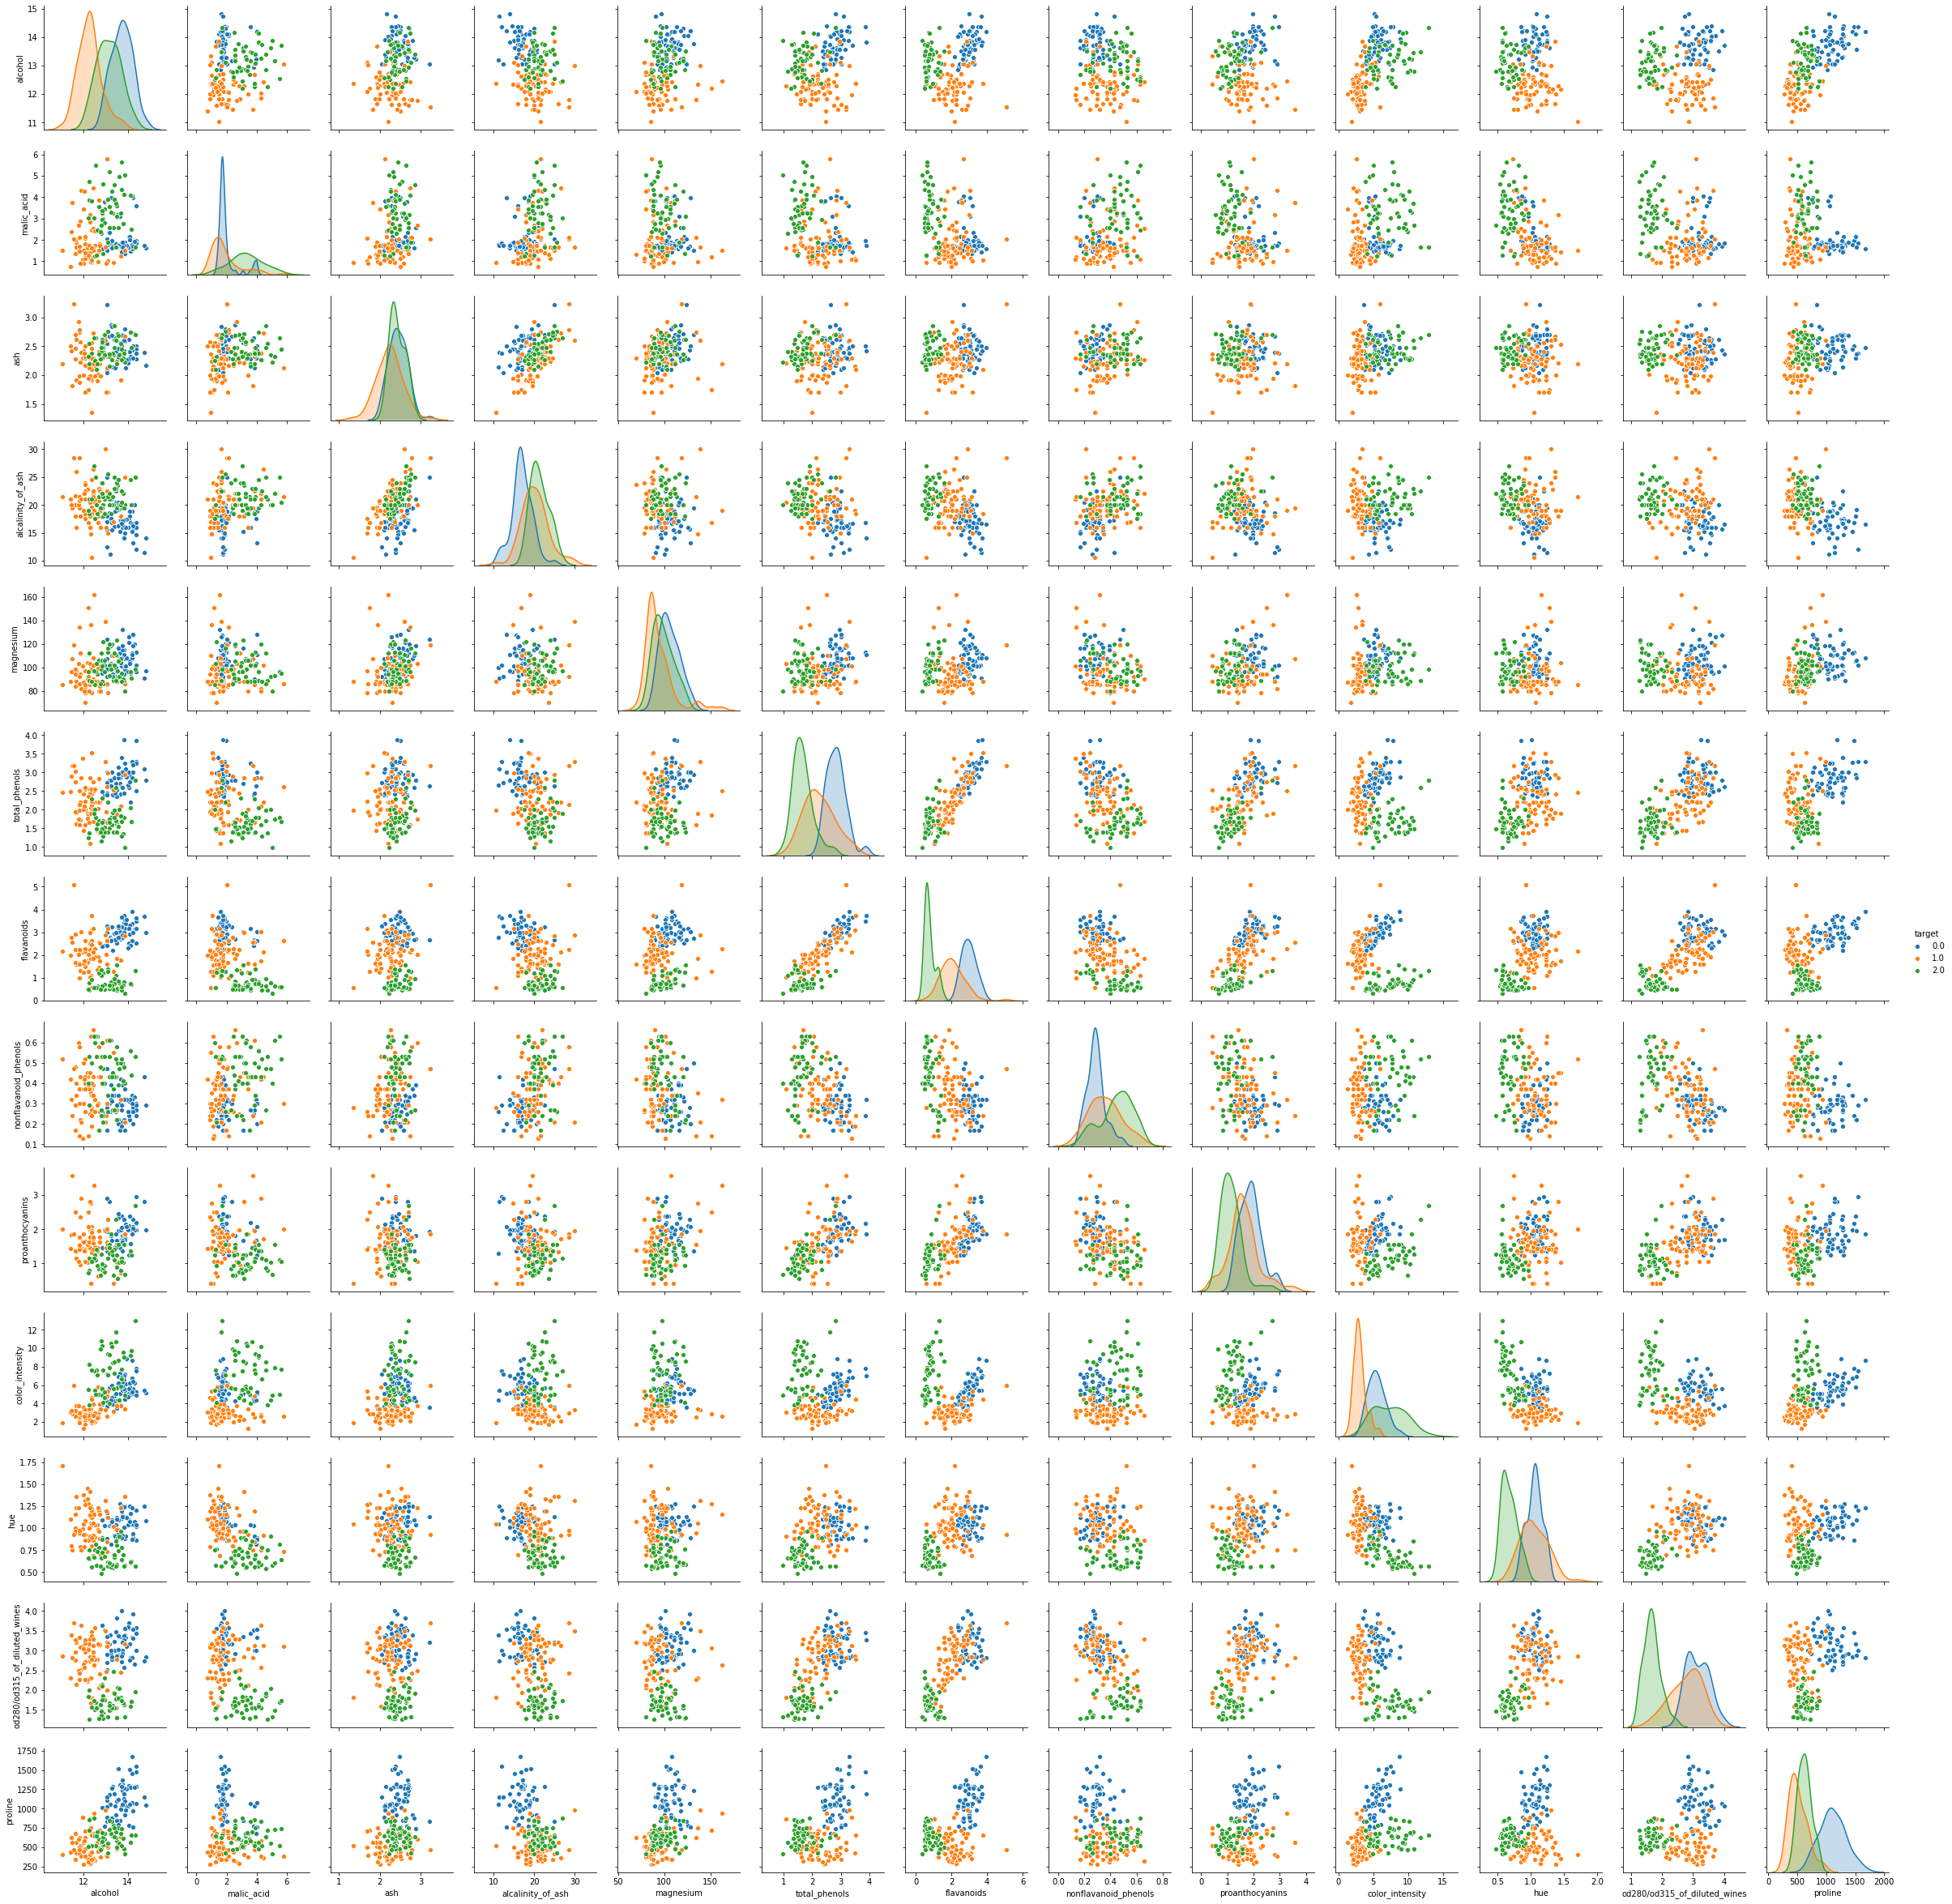

In [6]:
import seaborn as sns

sns.pairplot(wine,
             vars=list(list(wine)[: len(list(wine)) -1]),
             hue='target')

##  4. Normalize a base

In [7]:
from sklearn.preprocessing import StandardScaler

feat  = wine.drop(['target'], axis=1)
label = wine['target']

feat_ss = pd.DataFrame(
    StandardScaler().fit_transform(feat),
    columns=feat.columns, 
    index=feat.index
)

feat_ss.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


##  5. Divida a base para treinamento e testes

In [8]:
from sklearn.model_selection import train_test_split

feat_train, feat_test, label_train, label_test = train_test_split(feat_ss, label, test_size=0.3, random_state=42)

##  6. Crie o classificador e classifique a base de testes

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(feat_train, label_train)
label_prediction = knn_classifier.predict(feat_test)
print(label_prediction)

[0. 0. 2. 0. 1. 0. 1. 2. 1. 2. 0. 2. 0. 2. 0. 1. 1. 1. 0. 1. 0. 1. 1. 2.
 2. 2. 1. 0. 1. 0. 0. 1. 2. 0. 0. 0. 2. 2. 1. 2. 0. 1. 1. 1. 2. 0. 1. 1.
 2. 0. 1. 0. 0. 2.]


##  7. Avalie os resultados para um K fixo

In [10]:
def sensitivity(true_positive, false_negative):
    return (true_positive / (true_positive + false_negative))

def specificity(true_negative, false_positive):
    return (true_negative / (true_negative + false_positive))

def accuracy(true_positive, true_negative, false_positive, false_negative):
    return ((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative))

def negative_predictive_value(true_negative, false_positive):
    return (true_negative / (true_negative + false_positive))

def precision(true_positive, false_positive):
    return (true_positive / (true_positive + false_positive))

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

cfr = classification_report(label_test, label_prediction)
print("\nClassification Report:\n\n", cfr)

cfm = confusion_matrix(label_test, label_prediction)
print("\nConfusion Matrix:\n\n", cfm)

# true_negative, false_positive, false_negative, true_positive = confusion_matrix(label_test, label_prediction).ravel()
# print("sensitivity        : ", sensitivity(true_positive, false_negative))
# print("specificity        : ", specificity(true_negative, false_positive))
# print("accuracy           : ", accuracy(true_positive, true_negative, false_positive, false_negative))
# print("negative_pred_value: ", negative_predictive_value(true_negative, false_positive))
# print("precision          : ", precision(true_positive, false_positive))


Classification Report:

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Confusion Matrix:

 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


##  8. Avalie os resultados em função do número de vizinhos K

#### Varie os valores de K de 1 a 30, treinando o classificador e medindo seu erro

In [14]:
def knn_classifier_results():
    results = {}
    for n in range(1,31):
        knn_classifier = KNeighborsClassifier(n_neighbors=n)
        knn_classifier.fit(feat_train, label_train)
        label_prediction = knn_classifier.predict(feat_test)
        results[n] = np.mean(label_prediction != label_test) # use '==' for correctness rate
    return results

In [15]:
import json

results = knn_classifier_results()
print(json.dumps(results, indent=2))

{
  "1": 0.037037037037037035,
  "2": 0.05555555555555555,
  "3": 0.037037037037037035,
  "4": 0.037037037037037035,
  "5": 0.037037037037037035,
  "6": 0.037037037037037035,
  "7": 0.037037037037037035,
  "8": 0.018518518518518517,
  "9": 0.037037037037037035,
  "10": 0.037037037037037035,
  "11": 0.037037037037037035,
  "12": 0.037037037037037035,
  "13": 0.037037037037037035,
  "14": 0.037037037037037035,
  "15": 0.037037037037037035,
  "16": 0.037037037037037035,
  "17": 0.037037037037037035,
  "18": 0.037037037037037035,
  "19": 0.037037037037037035,
  "20": 0.037037037037037035,
  "21": 0.05555555555555555,
  "22": 0.05555555555555555,
  "23": 0.018518518518518517,
  "24": 0.018518518518518517,
  "25": 0.018518518518518517,
  "26": 0.037037037037037035,
  "27": 0.018518518518518517,
  "28": 0.018518518518518517,
  "29": 0.018518518518518517,
  "30": 0.05555555555555555
}


#### Plote o gráfico deste erro

Text(0, 0.5, 'Error Rate')

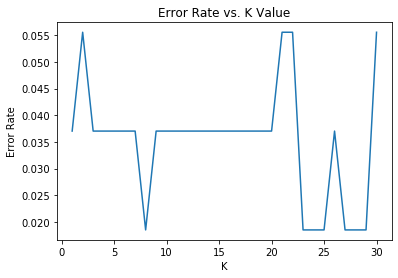

In [16]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()),
         list(results.values()))

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Escolha como classificador o melhor valor de k

In [17]:
best_k = min(results, key=results.get)
print("Lowest 'Error Rate' was achieved with 'n_neighbors=", best_k,"': ", results.get(best_k))

Lowest 'Error Rate' was achieved with 'n_neighbors= 8 ':  0.018518518518518517


#### Execute o k-Fold Cross Validation para obter a média da performance.

In [18]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=best_k)
scores = cross_val_score(knn_cv, feat_train, label_train, cv=5)

print("Scores: ", scores)
print("Mean Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:  [0.88       1.         0.96       0.96       0.91666667]
Mean Score: 0.94 (+/- 0.08)


## 9. Avalie o classificador utilizando validação cruzada.

#### Varie os valores de K de 1 a 30, treinando o classificador e medindo seu erro

In [19]:
def knn_classifier_cv_results():
    results = {}
    for n in range(1,31):
        knn_classifier = KNeighborsClassifier(n_neighbors=n)
        scores = cross_val_score(knn_classifier, feat_train, label_train, cv=5)
        results[n] = scores.mean()
    return results

In [20]:
import json

results_cv = knn_classifier_cv_results()
print(json.dumps(results_cv, indent=2))

{
  "1": 0.9193333333333333,
  "2": 0.9273333333333333,
  "3": 0.9273333333333333,
  "4": 0.9353333333333333,
  "5": 0.952,
  "6": 0.9273333333333333,
  "7": 0.952,
  "8": 0.9433333333333334,
  "9": 0.9196666666666667,
  "10": 0.9273333333333333,
  "11": 0.9356666666666665,
  "12": 0.9433333333333334,
  "13": 0.9433333333333334,
  "14": 0.9433333333333334,
  "15": 0.9516666666666665,
  "16": 0.9516666666666665,
  "17": 0.9596666666666666,
  "18": 0.9516666666666665,
  "19": 0.9596666666666666,
  "20": 0.9596666666666666,
  "21": 0.9596666666666666,
  "22": 0.9513333333333334,
  "23": 0.9513333333333334,
  "24": 0.9513333333333334,
  "25": 0.9516666666666665,
  "26": 0.9513333333333334,
  "27": 0.9433333333333334,
  "28": 0.9433333333333334,
  "29": 0.9433333333333334,
  "30": 0.9433333333333334
}


#### Plote o gráfico deste erro

Text(0, 0.5, 'Score Mean')

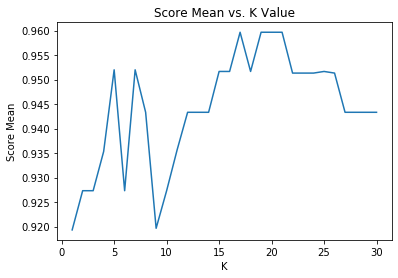

In [21]:
import matplotlib.pyplot as plt

plt.plot(list(results_cv.keys()),
         list(results_cv.values()))

plt.title('Score Mean vs. K Value')
plt.xlabel('K')
plt.ylabel('Score Mean')

#### Escolha como classificador o melhor valor de k

In [22]:
best_k_cv = max(results_cv, key=results_cv.get)
print("Highest 'Score Mean' was achieved with 'n_neighbors=", best_k_cv,"': ", results_cv.get(best_k_cv))

Highest 'Score Mean' was achieved with 'n_neighbors= 17 ':  0.9596666666666666


#### Execute o k-Fold Cross Validation para obter a média da performance.

In [24]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=best_k_cv)
scores = cross_val_score(knn_cv, feat_train, label_train, cv=5)

print("Scores: ", scores)
print("Mean Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:  [0.92       1.         0.96       0.96       0.95833333]
Mean Score: 0.96 (+/- 0.05)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

cfr_cv = classification_report(label_test, label_prediction)
print("\nClassification Report:\n\n", cfr_cv)

cfm_cv = confusion_matrix(label_test, label_prediction)
print("\nConfusion Matrix:\n\n", cfm_cv)


Classification Report:

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Confusion Matrix:

 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
